# Solution for exercise: Exploring Urban Networks with OSMnx

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
city_aoi = "Saint Louis, Senegal"

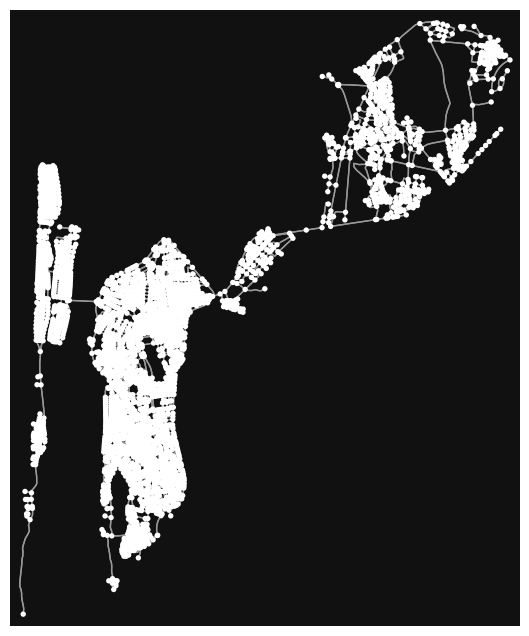

In [ ]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place(city_aoi, network_type="drive")
fig, ax = ox.plot_graph(G)

In [ ]:
# convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [ ]:
# Download hospitals within the bounding box of the street network
hospitals = ox.features_from_place(city_aoi, tags={"building": "hospital"})

In [ ]:
target_hospital = hospitals[hospitals["name"] == "Hôpital régional de Saint-Louis"]

In [ ]:
# Download hospitals within the bounding box of the street network
university = ox.features_from_place(city_aoi, tags={"amenity": "university"})

In [ ]:
target_university = university[university["name"] == "Université Gaston Berger"]

In [ ]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [ ]:
x_orig = target_university.to_crs(4326).centroid.get_coordinates()["x"].iloc[0]
y_orig = target_university.to_crs(4326).centroid.get_coordinates()["y"].iloc[0]

/var/folders/vs/r3fy_xr57wq7t0j69q6nx7540000gn/T/ipykernel_96925/1855389852.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_orig = target_university.to_crs(4326).centroid.get_coordinates()['x'].iloc[0]
/var/folders/vs/r3fy_xr57wq7t0j69q6nx7540000gn/T/ipykernel_96925/1855389852.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_orig = target_university.to_crs(4326).centroid.get_coordinates()['y'].iloc[0]


In [ ]:
x_dest = target_hospital.to_crs(4326).centroid.get_coordinates()["x"].iloc[0]
y_dest = target_hospital.to_crs(4326).centroid.get_coordinates()["y"].iloc[0]

/var/folders/vs/r3fy_xr57wq7t0j69q6nx7540000gn/T/ipykernel_96925/2055096079.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x_dest = target_hospital.to_crs(4326).centroid.get_coordinates()['x'].iloc[0]
/var/folders/vs/r3fy_xr57wq7t0j69q6nx7540000gn/T/ipykernel_96925/2055096079.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y_dest = target_hospital.to_crs(4326).centroid.get_coordinates()['y'].iloc[0]


In [ ]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=x_orig, Y=y_orig)
dest = ox.distance.nearest_nodes(G, X=x_dest, Y=y_dest)

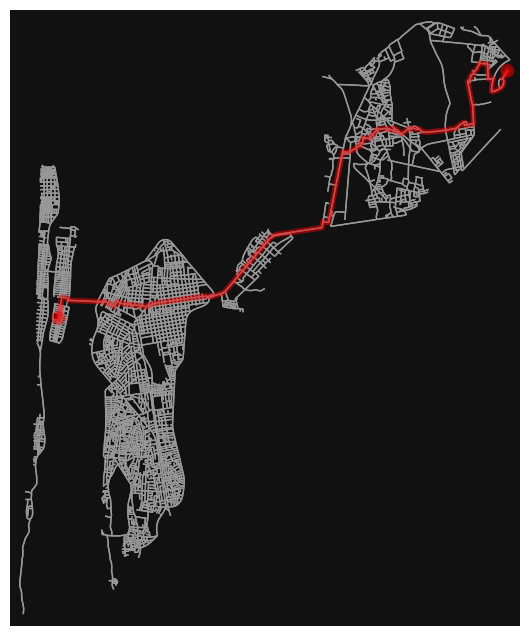

In [ ]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

13253

In [ ]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

9732